In [ ]:
r_tokenizer.pad_token = r_tokenizer.eos_token
r_train_encodings = r_tokenizer(train_querys, truncation=True, padding=True)
r_val_encodings = r_tokenizer(val_querys, truncation=True, padding=True)
r_test_encodings = r_tokenizer(test_querys, truncation=True, padding=True)

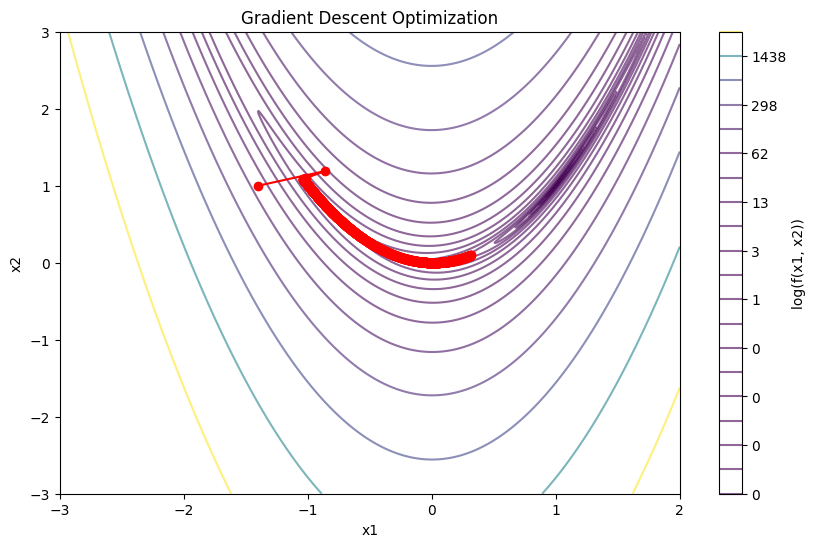

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

def gradient_f(x1, x2):
    df_dx1 = 2 * (200 * x1**3 - 200 * x1 * x2 + x1 - 1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

def gradient_descent(initial_point, learning_rate, num_iterations):
    point = initial_point
    points_history = [point]
    for _ in range(num_iterations):
        grad = gradient_f(point[0], point[1])
        point = point - learning_rate * grad
        points_history.append(point)
    return np.array(points_history)

# 초기 점 설정
initial_point = np.array([-1.4, 1])
# 학습률 설정
learning_rate = 0.001
# 반복 횟수 설정
num_iterations = 1000

# Gradient Descent를 사용하여 최적의 점 찾기
points_history = gradient_descent(initial_point, learning_rate, num_iterations)

# 시각화
x1 = np.linspace(-3, 2, 400)
x2 = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=np.logspace(-3, 3.5, 20), cmap='viridis', alpha=0.6)
plt.plot(points_history[:, 0], points_history[:, 1], '-o', color='red')
plt.title('Gradient Descent Optimization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='log(f(x1, x2))')
plt.show()


In [26]:
import re

def spliter(query):
    q = re.split('[?!.]',query)
    for i in q:
        if len(i)<2:
            q.remove(i)
    return q


import pandas as pd
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')

documents2 = list(train.질문_1)
documents = list(train.질문_2) 
answer = list(train.답변_1)
querys    = list(test.질문)

i=0
# query = spliter(querys[i])

from retriever import JH_retriever
for i,query in enumerate(querys):
    q = spliter(query)
    print(q)
    sub =''
    for qi in q:
        top_n_documents,doc_scores = JH_retriever(documents,qi,n=1,tokenizer_type='bm')
        # top_n_documents2,doc_scores2 = JH_retriever(documents2,qi,n=1,tokenizer_type='jh')
        # print(top_n_documents,top_n_documents2)
        corpus_index = documents.index(top_n_documents[0]) 
        # corpus_index2 = documents2.index(top_n_documents2[0])
        # print(corpus_index,corpus_index2)
        sub+=answer[corpus_index]+' '
    print(sub)
    break


['방청 페인트의 종류에는 어떤 것들이 있는지 알고 계신가요', ' 또한, 원목사이딩을 사용하는 것에 어떤 단점이 있을까요']
방청 페인트는 철골 구조물, 자동차 및 가전제품 철재 부속품, 선박 및 컨테이너박스 외관에 사용됩니다. 원목사이딩의 단점은 가격대가 높고 관리가 어려우며 습기에 약해 뒤틀림, 부서짐, 수축/팽장이 생길 수 있다는 점입니다. 


In [27]:
import numpy as np
from sentence_transformers import SentenceTransformer # SentenceTransformer Version 2.2.2

# Embedding Vector 추출에 활용할 모델(distiluse-base-multilingual-cased-v1) 불러오기
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
xx = np.array([sub])
y = model.encode(xx)
y.shape

(1, 512)

In [28]:
import pandas as pd
submission = pd.read_csv('open/sample_submission.csv')
submission.head(2)

,id,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,...,vec_502,vec_503,vec_504,vec_505,vec_506,vec_507,vec_508,vec_509,vec_510,vec_511
0,TEST_000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TEST_001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
id = submission.id
submission.drop(['id'],axis = 1, inplace = True)
submission.head(2)

,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,...,vec_502,vec_503,vec_504,vec_505,vec_506,vec_507,vec_508,vec_509,vec_510,vec_511
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from retriever import JH_retriever
for i,query in enumerate(querys):
    q = spliter(query)
    print(q)
    sub =''
    for qi in q:
        top_n_documents,doc_scores = JH_retriever(documents,qi,n=1,tokenizer_type='bm')
        # top_n_documents2,doc_scores2 = JH_retriever(documents2,qi,n=1,tokenizer_type='jh')
        # print(top_n_documents,top_n_documents2)
        corpus_index = documents.index(top_n_documents[0]) 
        # corpus_index2 = documents2.index(top_n_documents2[0])
        # print(corpus_index,corpus_index2)
        sub+=answer[corpus_index]+' '
    sub = sub.strip()
    print(sub)
    sub = np.array([sub])
    try:
        submission.loc[i] = model.encode(sub)[0].tolist()
    except Exception as e:
        print('ERROR !!!!')
        print(e)
        print(i)
        

['방청 페인트의 종류에는 어떤 것들이 있는지 알고 계신가요', ' 또한, 원목사이딩을 사용하는 것에 어떤 단점이 있을까요']
방청 페인트는 철골 구조물, 자동차 및 가전제품 철재 부속품, 선박 및 컨테이너박스 외관에 사용됩니다. 원목사이딩의 단점은 가격대가 높고 관리가 어려우며 습기에 약해 뒤틀림, 부서짐, 수축/팽장이 생길 수 있다는 점입니다.


/var/folders/j9/psjfyfss16v_xrrj6mh5sw0h0000gn/T/ipykernel_1447/135315226.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0822887048125267' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.loc[i] = model.encode(sub)[0].tolist()
/var/folders/j9/psjfyfss16v_xrrj6mh5sw0h0000gn/T/ipykernel_1447/135315226.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07817734777927399' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.loc[i] = model.encode(sub)[0].tolist()
/var/folders/j9/psjfyfss16v_xrrj6mh5sw0h0000gn/T/ipykernel_1447/135315226.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.007565884850919247' has dtype incompatible with 

['도배지에 녹은 자국이 발생하는 주된 원인과 그 해결 방법은 무엇인가요']
AD, PD에 면한 벽체 결로의 원인은 외기에 접하는 면 좌, 우측 벽체에는 단열재가 계획되어 있으나 각종 덕트와 접한 부분은 통상 단열재가 계획되어 있지 않기 때문입니다.
['큐블럭의 단점을 알려주세요', ' 또한, 압출법 단열판을 사용하는 것의 장점은 무엇인가요']
큐블럭은 일반 벽돌에 비해 가격이 비싸고 균열이 생기기 쉬우며 습기로 인해 하자가 발생할 수 있다는 점이 단점입니다. 압출법단열판은 시간이 지나면 단열 성능이 떨어지는 경시현상이 있고 비드법 단열재에 비래 가격이 높은 편이며 충격에 약해서 파손율이 높은 편이라는 단점이 있습니다.
['철골구조를 사용하는 고층 건물에서, 단열 효과를 높이기 위한 시공 방법은 무엇이 있을까요']
일반철골구조는 형강, 강판, 평강 등의 강재를 볼트, 용접 등으로 접합하여 조립한 것을 주요한 뼈대로 한 구조를 의미합니다.
['도배지의 완전한 건조를 위해 몇 주 동안 기다려야 하나요']
도배 후 완전 건조되기 전까지 꼬임이 발생할 수 있습니다.
['철근철골콘크리트 구조가 적용된 건물의 장단점은 무엇인가요']
철근철골콘크리트는 철골과 철근, 그리고 콘크리트를 함께 사용하는 건축 구조입니다. 철골은 강하고 가벼운 소재로, 높은 내구성과 강도를 가지고 있어 대규모 공간이나 강성이 요구되는 대형 고층건물에 적합합니다. 그러나 화재에 취약하고 녹이 슬면 강성이 떨어지는 단점이 있습니다. 이를 보완하기 위해 철근과 콘크리트를 섞어 사용하는 방식이 개발되었습니다. 철근콘크리트는 철근이 인장력을, 콘크리트가 압축력을 담당하여 강성을 가지며 콘크리트의 열전도가 낮은 재료상 특징을 이용해 서로의 단점을 보완하도록 결합한 구조입니다. 내화성, 내구성, 내진성능이 뛰어나지만 자중이 크고 시공과정이 복잡하며 공사기간이 길고 균일한 시공이 불가능하다는 단점이 있습니다. 철근철골콘크리트는 이 두 가지 구조의 장점을 살려 만든 것으로, 철골 뼈대로 구조를 세우고 그 주변을 

In [31]:
total_submission = pd.DataFrame({'id': id})
total_submission

,id
0,TEST_000
1,TEST_001
2,TEST_002
3,TEST_003
4,TEST_004
...,...
125,TEST_125
126,TEST_126
127,TEST_127
128,TEST_128


In [32]:
submission

,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,...,vec_502,vec_503,vec_504,vec_505,vec_506,vec_507,vec_508,vec_509,vec_510,vec_511
0,0.082289,0.078177,-0.007566,0.016436,0.042882,0.010518,0.009421,-0.053581,0.008390,0.052455,...,0.001146,0.024480,-0.003624,-0.029295,-0.031015,0.041179,-0.012982,0.022933,-0.014084,0.022952
1,0.032018,0.011894,0.036182,0.033542,0.130737,-0.049234,0.003015,0.021685,-0.053119,0.023734,...,-0.007231,-0.079961,0.033407,-0.033836,0.037447,0.074262,0.028318,-0.016120,-0.075386,0.060418
2,0.016789,-0.039651,-0.054724,-0.014792,0.123894,-0.080863,-0.014065,-0.013819,0.027941,0.051175,...,-0.046766,-0.019072,0.032187,-0.023544,0.011023,0.006729,-0.045764,-0.028297,-0.040990,0.110298
3,0.001359,0.028748,0.031155,0.032771,0.019400,0.027076,-0.025317,0.037004,0.063288,-0.002363,...,-0.027349,0.032182,0.072578,0.007088,-0.000209,0.019544,-0.013552,-0.009762,-0.072858,0.026452
4,-0.043666,-0.049716,-0.022143,-0.005386,-0.022093,-0.002680,0.077951,0.026059,-0.039270,-0.009311,...,-0.046584,0.019604,-0.010414,0.026639,-0.024335,0.044780,-0.043129,0.015099,0.066895,-0.051406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.031051,-0.042877,0.031937,0.017099,0.117416,-0.067439,0.066705,0.045818,0.048276,0.027288,...,0.015510,0.010079,0.049628,-0.039794,0.013365,0.052424,0.044177,-0.025570,-0.028258,0.009069
126,0.043365,0.002761,-0.024558,0.020286,0.035962,-0.000235,0.013956,0.016391,0.056851,-0.004243,...,-0.008920,-0.034604,0.027279,-0.061165,0.100643,0.011318,0.036681,-0.006900,0.009857,-0.013823
127,-0.052382,-0.018329,0.035593,0.011810,-0.030468,-0.042393,0.003020,-0.096194,-0.025034,0.004232,...,0.000032,-0.037387,0.000278,-0.065751,-0.047574,-0.016962,0.061244,0.069212,0.032370,-0.017196
128,-0.015712,-0.013741,-0.033659,0.043170,0.089922,-0.044804,0.002058,-0.009435,-0.062752,0.037159,...,-0.019795,-0.131440,0.040366,-0.030257,0.025886,0.070889,-0.025162,-0.072261,-0.037656,0.040231


In [33]:
sub = pd.concat([total_submission, submission] , axis = 1)

In [34]:
sub.to_csv('b2v2_submission.csv', index = False)

In [35]:
import pandas as pd

t1 = pd.read_csv('b2v2_submission.csv')
# t2 = pd.read_csv('b2_an5_submission.csv')
# t2 = pd.read_csv('../output/0717_b2v2_an1_submission.csv')
t2 = pd.read_csv('../output/0697_bm25_retriver_an5_submission.csv')

t1.head(1)
t2.head(1)

,id,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,...,vec_502,vec_503,vec_504,vec_505,vec_506,vec_507,vec_508,vec_509,vec_510,vec_511
0,TEST_000,0.016505,0.027477,-0.007674,0.023561,0.043476,0.016157,-0.043902,0.07508,0.053489,...,-0.019078,-0.039833,-0.009508,-0.033278,-0.007745,0.02288,0.042437,0.022185,0.002829,0.045073


In [36]:
count=0
for col in list(t1.keys()):
    for i in range(129):
        if t1[col][i]!=t2[col][i]:
            print(t1[col][i],t2[col][i])
            count+=1
print(count)

0.0822887048125267 0.0165054835379123
0.0320182703435421 -0.00267059286125
0.0167894456535577 0.0036377061624079
0.0013585604028776 0.0280421301722526
-0.0436664298176765 -0.0088387904688715
0.0056277993135154 -0.0018583261407911
-0.0224549770355224 -0.0169057361781597
0.0088285785168409 -0.00267059286125
-0.0022984619718044 -0.0232092663645744
0.0013585604028776 -0.0249040722846984
-0.0240278951823711 0.007759939879179
0.0118910633027553 0.0185840819031
0.0056277993135154 -0.0018583261407911
0.021384235471487 0.0137091502547264
0.0240695029497146 0.0190856717526912
0.0012304642004892 0.0185313504189252
-0.009860792197287 0.0105350604280829
0.0363863669335842 -0.010149523615837
0.0168632101267576 0.0145768178626894
-0.0134560335427522 -0.0040750936605036
0.0172102935612201 0.0335174538195133
0.0161838140338659 -0.0010767509229481
-0.0069463970139622 -0.0331363007426261
-0.0200715400278568 0.0079043051227927
0.0286412257701158 -0.0197850000113248
0.0115137696266174 0.0034679672680795
-0

first formulation :
$$
L_c = - \sum [y_i log(s_i) + (1 - y_i) log(1 - s_i)]
$$


second formulation :
$$
L_i=-\sum_{i=1}^N \log \frac{e^{\operatorname{sim}\left(\mathbf{I}_i, \mathbf{T}_i\right) / \tau}}{\sum_{j=1}^N e^{\operatorname{sim}\left(\mathbf{I}_i, \mathbf{T}_j\right) / \tau}} +\log \frac{e^{\operatorname{sim}\left(\mathbf{T}_i, \mathbf{I}_i\right) / \tau}}{\sum_{j=1}^N e^{\operatorname{sim}\left(\mathbf{T}_i, \mathbf{I}_j\right) / \tau}}
$$

In [ ]:
import torch.nn.functional as F
image_embeddings = torch.randn(16,512)
text_embeddings = torch.randn(16,512)
temperature = 1
logits = (text_embeddings @ image_embeddings.T) / temperature
images_similarity = image_embeddings @ image_embeddings.T
texts_similarity = text_embeddings @ text_embeddings.T
targets = F.softmax(
    (images_similarity + texts_similarity) / 2 * temperature, dim=-1
)
# targets


def cross_entropy(preds, targets, reduction='none'):
    log_softmax = nn.LogSoftmax(dim=-1)
    loss = (-targets * log_softmax(preds)).sum(1)
    if reduction == "none":
        return loss
    elif reduction == "mean":
        return loss.mean()
    
    
texts_loss = cross_entropy(logits, targets, reduction='none')
images_loss = cross_entropy(logits.T, targets.T, reduction='none')
loss =  (images_loss + texts_loss) / 2.0 # shape: (batch_size)
# return loss.mean()


In [ ]:
import torch
import torch.nn as nn
m = nn.Softmax(dim=1)
input = torch.randn(3, 3)
output = m(input)
output

tensor([[0.5460, 0.2744, 0.1796],
        [0.6729, 0.1780, 0.1491],
        [0.1775, 0.1324, 0.6901]])

In [212]:
import torch

import torch.nn as nn
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
# output.backward()
output

tensor(2.3354, grad_fn=<NllLossBackward0>)

In [87]:
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output.backward()

tensor([[0.0340, 0.3803, 0.1363, 0.0235, 0.4259],
        [0.0383, 0.2475, 0.0524, 0.0976, 0.5642],
        [0.0728, 0.3000, 0.0456, 0.0154, 0.5661]])

In [219]:
class CFG:
    debug = False
    image_path = "C:/Moein/AI/Datasets/Flicker-8k/Images"
    captions_path = "C:/Moein/AI/Datasets/Flicker-8k"
    batch_size = 32
    num_workers = 4
    head_lr = 1e-3
    image_encoder_lr = 1e-4
    text_encoder_lr = 1e-5
    weight_decay = 1e-3
    patience = 1
    factor = 0.8
    epochs = 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_name = 'resnet50'
    image_embedding = 2048
    text_encoder_model = "distilbert-base-uncased"
    text_embedding = 768
    text_tokenizer = "distilbert-base-uncased"
    max_length = 200

    pretrained = True # for both image encoder and text encoder
    trainable = True # for both image encoder and text encoder
    temperature = 1.0

    # image size
    size = 224

    # for projection head; used for both image and text encoders
    num_projection_layers = 1
    projection_dim = 256
    dropout = 0.1
    
CFG.dropout

0.1